# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
#from api_keys import api_key
api_key = "45a880c9bc30c9806ca7b99294cbed0f"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
#make 
len(cities)

623

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
#create variable for the URL
url= "http://api.openweathermap.org/data/2.5/weather?appid=" + api_key

city_data = []

#print to logger
print ("Beginning Data Retrieval")
print( "------------------------")

#Create Counters
record_count = 1
set_count = 1

#loop through all citiies in our list
for i, city in enumerate(cities):

    #group cities in sets of 50 for logging
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
        
        #create endpoint URL with each city[]
        city_url = url + "&q=" + city
#print(city_url)

#Log the URL, Record and Set Numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

#Add 1 to the record count
    record_count += 1

#Run an API request for each of the cities
    try:
        #parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        #print(city_weather)

        #parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        #print ['Working on City []']
        #Append the City Information into city_data list

        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max_Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind_Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date
    })

        #if an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

#Indicate that data loading is complete
print("------------------------------")
print("Data Retrieval Complete       ")
print("------------------------------")
#print(city_data)


Beginning Data Retrieval
------------------------
Processing Record 1 of Set 1 | mys shmidta
Processing Record 2 of Set 1 | bengkulu
Processing Record 3 of Set 1 | inuvik
Processing Record 4 of Set 1 | nishihara
Processing Record 5 of Set 1 | dunedin
Processing Record 6 of Set 1 | tasiilaq
Processing Record 7 of Set 1 | kloulklubed
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | port alfred
Processing Record 11 of Set 1 | ikungi
Processing Record 12 of Set 1 | vylgort
Processing Record 13 of Set 1 | mar del plata
Processing Record 14 of Set 1 | katsuura
Processing Record 15 of Set 1 | cape town
Processing Record 16 of Set 1 | kyabe
Processing Record 17 of Set 1 | yomou
Processing Record 18 of Set 1 | awbari
Processing Record 19 of Set 1 | belushya guba
Processing Record 20 of Set 1 | constitucion
Processing Record 21 of Set 1 | castro
Processing Record 22 of Set 1 | tautira
Processing Record 23 of Set 1 | samusu
Processing Re

Processing Record 2 of Set 5 | ancud
Processing Record 3 of Set 5 | paveh
Processing Record 4 of Set 5 | nordborg
Processing Record 5 of Set 5 | sabzevar
Processing Record 6 of Set 5 | eyl
Processing Record 7 of Set 5 | dikson
Processing Record 8 of Set 5 | itarema
Processing Record 9 of Set 5 | jiayuguan
Processing Record 10 of Set 5 | coihaique
Processing Record 11 of Set 5 | loanda
Processing Record 12 of Set 5 | provideniya
Processing Record 13 of Set 5 | sorland
Processing Record 14 of Set 5 | dingle
Processing Record 15 of Set 5 | amderma
Processing Record 16 of Set 5 | turukhansk
Processing Record 17 of Set 5 | bonthe
Processing Record 18 of Set 5 | carballo
Processing Record 19 of Set 5 | jetpur
Processing Record 20 of Set 5 | ferme-neuve
Processing Record 21 of Set 5 | gorlev
Processing Record 22 of Set 5 | kavieng
Processing Record 23 of Set 5 | cravo norte
Processing Record 24 of Set 5 | alice springs
Processing Record 25 of Set 5 | kaeo
Processing Record 26 of Set 5 | vestm

Processing Record 3 of Set 9 | sioux lookout
Processing Record 4 of Set 9 | albanel
Processing Record 5 of Set 9 | luena
Processing Record 6 of Set 9 | kaminskiy
Processing Record 7 of Set 9 | hjelset
Processing Record 8 of Set 9 | pundaguitan
Processing Record 9 of Set 9 | shubarshi
Processing Record 10 of Set 9 | isangel
Processing Record 11 of Set 9 | rawannawi
Processing Record 12 of Set 9 | namibe
Processing Record 13 of Set 9 | barentu
Processing Record 14 of Set 9 | vanimo
Processing Record 15 of Set 9 | vitim
Processing Record 16 of Set 9 | attawapiskat
Processing Record 17 of Set 9 | turtkul
Processing Record 18 of Set 9 | aswan
Processing Record 19 of Set 9 | watsa
Processing Record 20 of Set 9 | souillac
Processing Record 21 of Set 9 | coahuayana
Processing Record 22 of Set 9 | biak
Processing Record 23 of Set 9 | port elizabeth
Processing Record 24 of Set 9 | beitbridge
Processing Record 25 of Set 9 | pailon
Processing Record 26 of Set 9 | ahipara
Processing Record 27 of Se

Processing Record 0 of Set 13 | tyukhtet
Processing Record 1 of Set 13 | zhuhai
Processing Record 2 of Set 13 | neyshabur
Processing Record 3 of Set 13 | dehloran
Processing Record 4 of Set 13 | erdenet
Processing Record 5 of Set 13 | halalo
Processing Record 6 of Set 13 | corning
Processing Record 7 of Set 13 | hami
Processing Record 8 of Set 13 | kearney
Processing Record 9 of Set 13 | parkes
Processing Record 10 of Set 13 | astorga
Processing Record 11 of Set 13 | arman
Processing Record 12 of Set 13 | sukumo
Processing Record 13 of Set 13 | yenagoa
Processing Record 14 of Set 13 | nenjiang
Processing Record 15 of Set 13 | havoysund
Processing Record 16 of Set 13 | kavaratti
Processing Record 17 of Set 13 | guaiba
Processing Record 18 of Set 13 | shahrud
Processing Record 19 of Set 13 | vilcun
Processing Record 20 of Set 13 | geraldton
Processing Record 21 of Set 13 | nynashamn
Processing Record 22 of Set 13 | lebanon
------------------------------
Data Retrieval Complete       
---

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
#create dataframe
city_df = pd.DataFrame(city_data)

#display count
city_df.count()

City          623
Cloudiness    623
Country       623
Date          623
Humidity      623
Lat           623
Lng           623
Max_Temp      623
Wind_Speed    623
dtype: int64

In [10]:
#save dataframe to csv
city_df.to_csv('city_df.csv')

#display dataframe
city_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_Temp,Wind_Speed
0,mys shmidta,51,RU,1564878692,91,56.54,89.31,288.0,1.1
1,bengkulu,51,RU,1564878692,91,56.54,89.31,288.0,1.1
2,inuvik,51,RU,1564878692,91,56.54,89.31,288.0,1.1
3,nishihara,51,RU,1564878692,91,56.54,89.31,288.0,1.1
4,dunedin,51,RU,1564878692,91,56.54,89.31,288.0,1.1


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

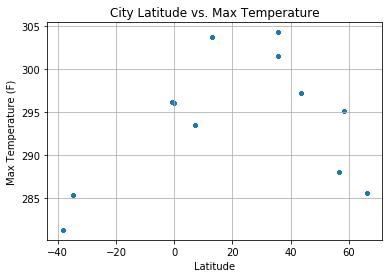

In [17]:
plt.scatter(city_df["Lat"], city_df["Max_Temp"], marker="o", s=10)
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("MaxTemp_v_Latitude.png")
plt.show()

#### Latitude vs. Humidity Plot

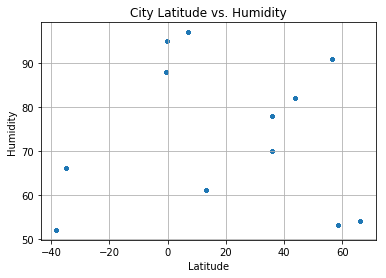

In [18]:
plt.scatter(city_df["Lat"], city_df["Humidity"], marker="o", s=10)
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("MaxTemp_v_Humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

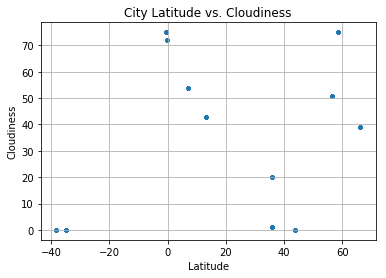

In [19]:
plt.scatter(city_df["Lat"], city_df["Cloudiness"], marker="o", s=10)
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("MaxTemp_v_Cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

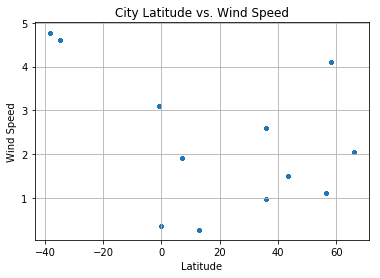

In [20]:
plt.scatter(city_df["Lat"], city_df["Wind_Speed"], marker="o", s=10)
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("MaxTemp_v_WindSpeed.png")
plt.show()